#Simulación problema de los tres cuerpos

In [ ]:
#Import scipy
import scipy as sci
import numpy as np
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [ ]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Dos cuerpos

In [ ]:
# Define masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Define initial position vectors
r1 = np.array([-0.5, 0, 0], dtype="float64")  # m
r2 = np.array([0.5, 0, 0], dtype="float64")  # m

# Find Centre of Mass
r_com = (m1 * r1 + m2 * r2) / (m1 + m2)

# Define initial velocities
v1 = np.array([0.01, 0.01, 0], dtype="float64")  # m/s
v2 = np.array([-0.05, 0, -0.1], dtype="float64")  # m/s

# Find velocity of COM
v_com = (m1 * v1 + m2 * v2) / (m1 + m2)

In [ ]:
#A function defining the equations of motion
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]
    r=sci.linalg.norm(r2-r1) #Calculate magnitude or norm of vector
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    r_derivs=sci.concatenate((dr1bydt,dr2bydt))
    derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))
    return derivs

In [ ]:
# Package initial parameters
init_params = np.array([r1, r2, v1, v2])  # create array of initial params
init_params = init_params.flatten()  # flatten array to make it 1D

# Define the time span using numpy.linspace
time_span = np.linspace(0, 8, 700)  # 700 puntos en el intervalo de tiempo de 0 a 8

# Run the ODE solver
import scipy.integrate
two_body_sol = scipy.integrate.odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

<ipython-input-4-8fac1f120937>:12: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((dr1bydt,dr2bydt))
<ipython-input-4-8fac1f120937>:13: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  derivs=sci.concatenate((r_derivs,dv1bydt,dv2bydt))


In [ ]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

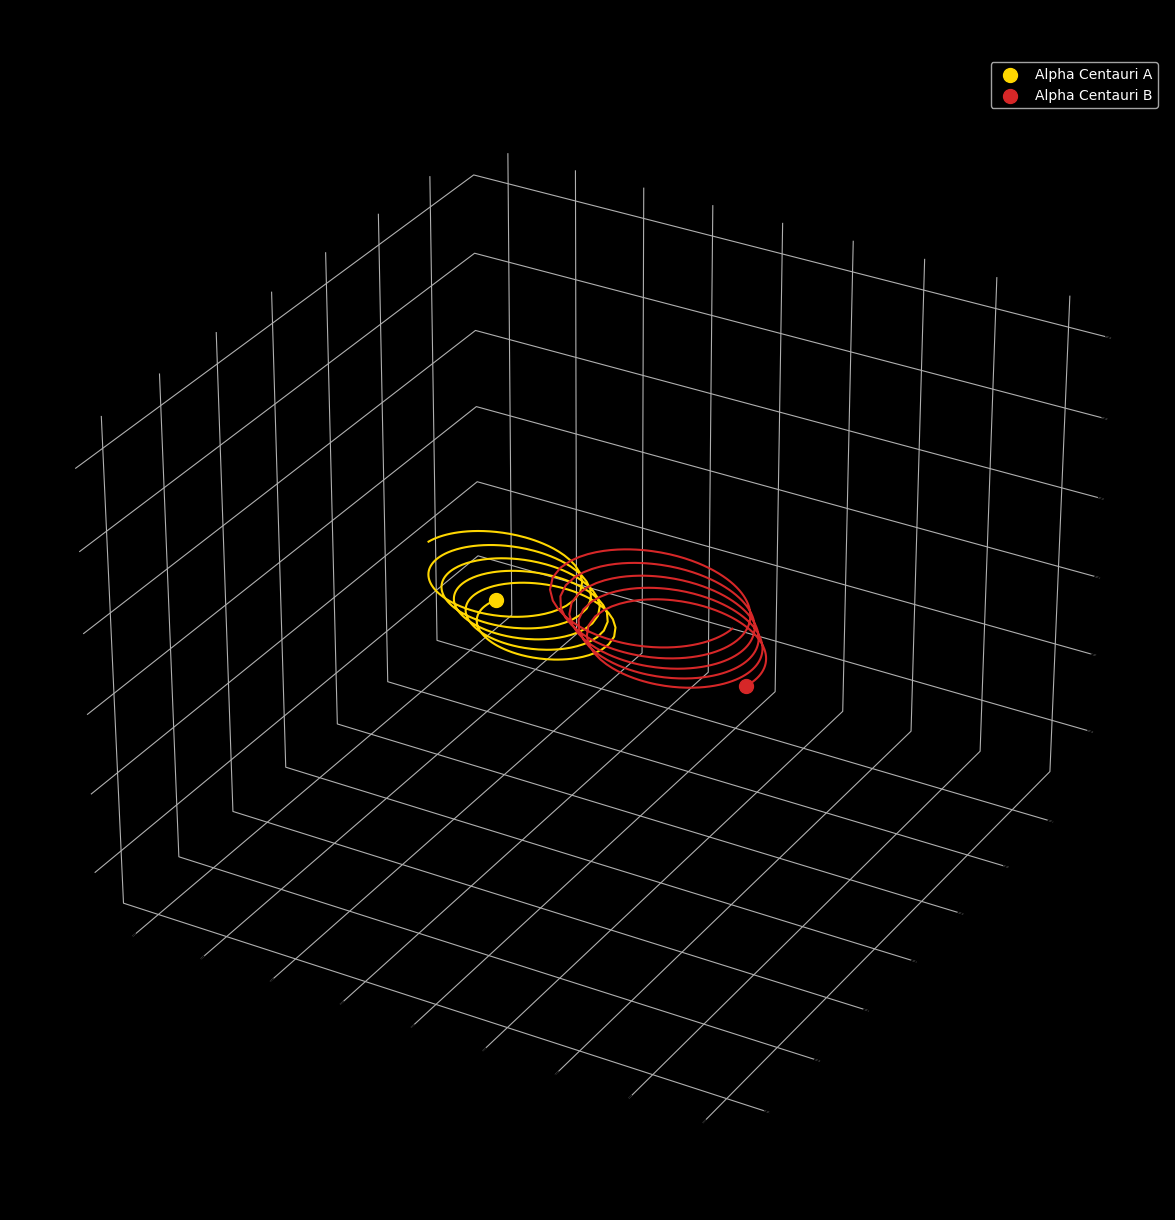

In [ ]:
#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

ax.set_facecolor('black')

#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="#FFD700")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="#FFD700",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

In [ ]:
# Importa la librería FuncAnimation de Matplotlib
from matplotlib.animation import FuncAnimation

In [ ]:
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    scat1._offsets3d = ([r1_sol[0, 0]], [r1_sol[0, 1]], [r1_sol[0, 2]])
    scat2._offsets3d = ([r2_sol[0, 0]], [r2_sol[0, 1]], [r2_sol[0, 2]])
    ax.legend(loc="upper left", fontsize=14)  # Agrega las leyendas al gráfico
    return line1, line2, scat1, scat2

In [ ]:
# Define una función que actualizará los datos en cada fotograma de la animación
def update(num, r1_sol, r2_sol, line1, line2, scat1, scat2):
    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])

    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])

    scat1._offsets3d = ([r1_sol[num, 0]], [r1_sol[num, 1]], [r1_sol[num, 2]])
    scat2._offsets3d = ([r2_sol[num, 0]], [r2_sol[num, 1]], [r2_sol[num, 2]])

    return line1, line2, scat1, scat2

Animación guardada exitosamente.


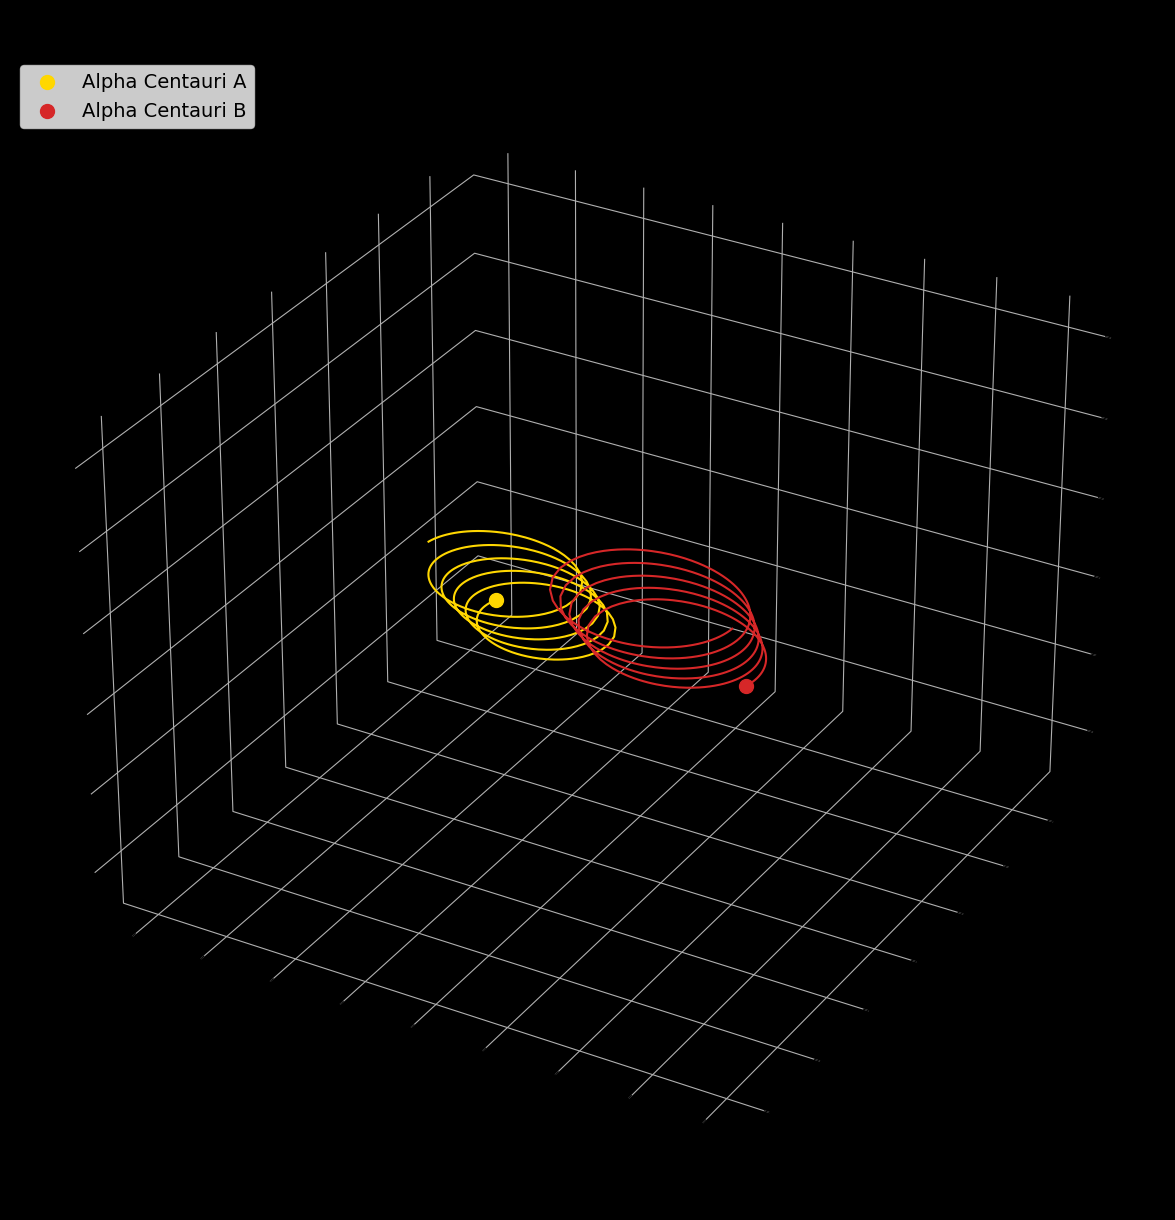

In [ ]:
# Crea la figura y los ejes 3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_facecolor('black')

# Plot de las órbitas
line1, = ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color="#FFD700")
line2, = ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color="tab:red")

# Plot de los puntos iniciales
scat1 = ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="#FFD700", marker="o", s=100, label="Alpha Centauri A")
scat2 = ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="tab:red", marker="o", s=100, label="Alpha Centauri B")

# Añadir etiquetas y título
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n", fontsize=14)

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()

legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# Crea la animación utilizando FuncAnimation
ani = FuncAnimation(fig, update, frames=len(time_span), fargs=(r1_sol, r2_sol, line1, line2, scat1, scat2),
                    init_func=init, blit=True, interval=40)

from matplotlib.animation import PillowWriter  # Importa PillowWriter aquí

# Crea el escritor de video GIF
writer = PillowWriter(fps=30)

# Guarda la animación como un archivo MP4
try:
    ani.save('C:\\Users\\santy\\Downloads\\animacion.gif', writer=writer)
    print("Animación guardada exitosamente.")
except FileNotFoundError as e:
    print("Error al guardar la animación:", e)

#Tres cuerpos

In [ ]:
#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=sci.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=sci.array(v3,dtype="float64")

<ipython-input-12-2a628b5d3afe>:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
<ipython-input-12-2a628b5d3afe>:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v3=sci.array(v3,dtype="float64")


In [ ]:
#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [ ]:
def ThreeBodyEquations(w, t, G, m1, m2, m3):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    v1 = w[9:12]
    v2 = w[12:15]
    v3 = w[15:18]
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r23 = np.linalg.norm(r3 - r2)

    dv1bydt = K1 * m2 * (r2 - r1) / r12 ** 3 + K1 * m3 * (r3 - r1) / r13 ** 3
    dv2bydt = K1 * m1 * (r1 - r2) / r12 ** 3 + K1 * m3 * (r3 - r2) / r23 ** 3
    dv3bydt = K1 * m1 * (r1 - r3) / r13 ** 3 + K1 * m2 * (r2 - r3) / r23 ** 3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2
    dr3bydt = K2 * v3
    r12_derivs = np.concatenate((dr1bydt, dr2bydt))
    r_derivs = np.concatenate((r12_derivs, dr3bydt))
    v12_derivs = np.concatenate((dv1bydt, dv2bydt))
    v_derivs = np.concatenate((v12_derivs, dv3bydt))
    derivs = np.concatenate((r_derivs, v_derivs))
    return derivs

In [ ]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,700) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

<ipython-input-15-4800af4b2d1b>:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
<ipython-input-15-4800af4b2d1b>:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,20,700) #20 orbital periods and 500 points


In [ ]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

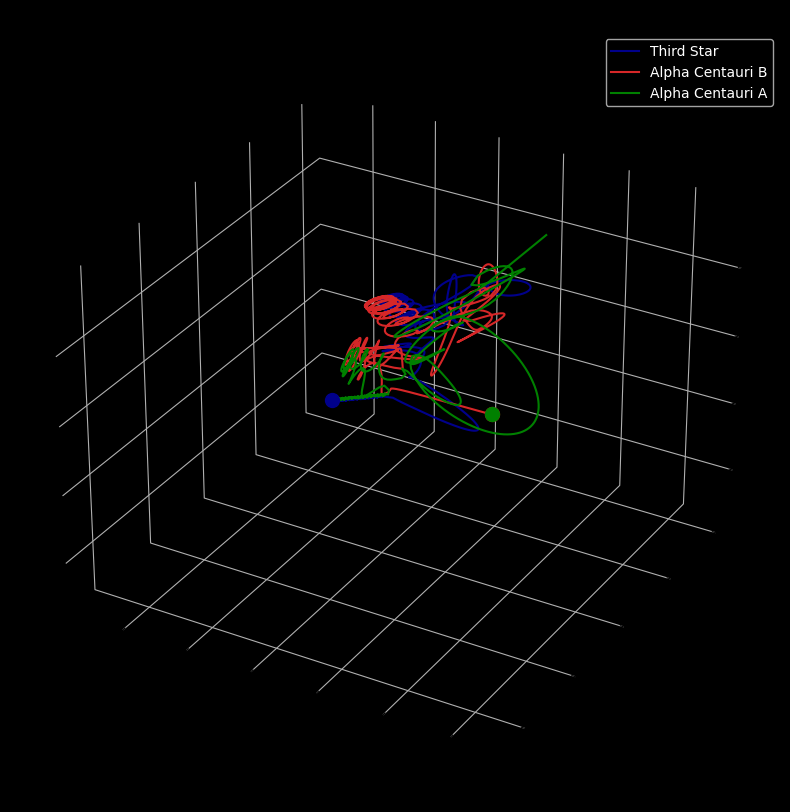

In [ ]:
# Crea la figura y los ejes 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_facecolor('black')

# Plot de las trayectorias de cada cuerpo
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='darkblue', label='Third Star')
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color='tab:red', label='Alpha Centauri B')
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color='green', label='Alpha Centauri A')

ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100)
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100)
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="green",marker="o",s=100)

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of orbits of stars in a three-body system')

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

In [ ]:
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    line3.set_data([], [])
    line3.set_3d_properties([])

    scat1._offsets3d = ([r1_sol[0, 0]], [r1_sol[0, 1]], [r1_sol[0, 2]])
    scat2._offsets3d = ([r2_sol[0, 0]], [r2_sol[0, 1]], [r2_sol[0, 2]])
    scat3._offsets3d = ([r3_sol[0, 0]], [r3_sol[0, 1]], [r2_sol[0, 2]])

    ax.legend(loc="upper left", fontsize=14)  # Agrega las leyendas al gráfico
    return line1, line2, scat1, scat2, scat3

In [ ]:
def update(num, r1_sol, r2_sol, r3_sol, line1, line2, line3, scat1, scat2, scat3):
    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])

    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])

    line3.set_data(r3_sol[:num, 0], r3_sol[:num, 1])
    line3.set_3d_properties(r3_sol[:num, 2])

    scat1._offsets3d = ([r1_sol[num, 0]], [r1_sol[num, 1]], [r1_sol[num, 2]])
    scat2._offsets3d = ([r2_sol[num, 0]], [r2_sol[num, 1]], [r2_sol[num, 2]])
    scat3._offsets3d = ([r3_sol[num, 0]], [r3_sol[num, 1]], [r3_sol[num, 2]])

    return line1, line2, line3, scat1, scat2, scat3


Animación guardada exitosamente.


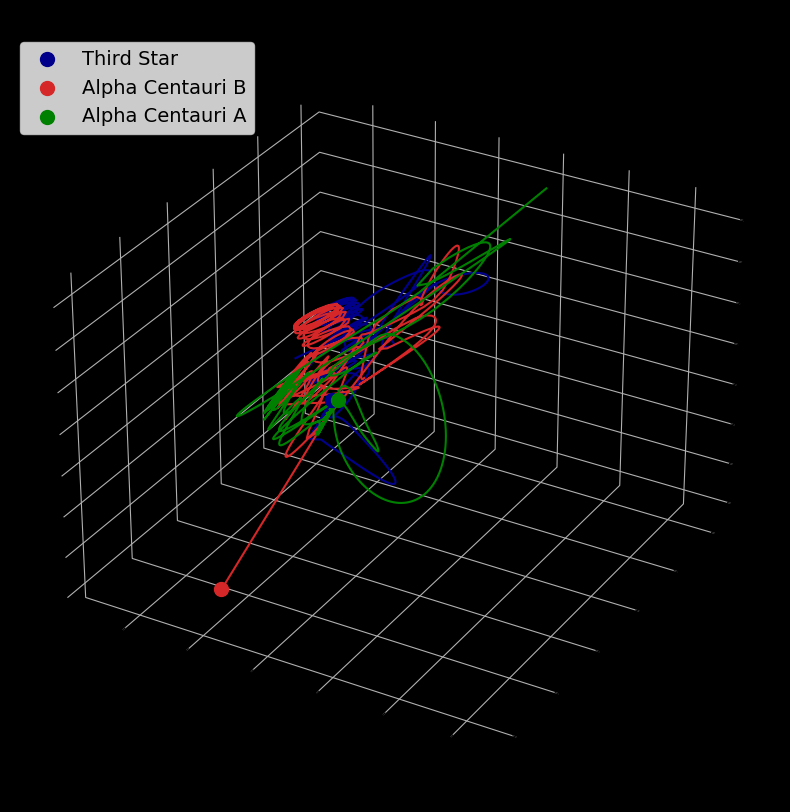

In [ ]:
# Creación de la figura y los ejes 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Establecer el color de fondo del subplot a oscuro
ax.set_facecolor('black')

# Dibujar las trayectorias de cada cuerpo
line1, = ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='darkblue')
line2, = ax.plot(r2_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='tab:red')
line3, = ax.plot(r3_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='green')

scat1 = ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="darkblue", marker="o", s=100, label="Third Star")
scat2 = ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="tab:red", marker="o", s=100, label="Alpha Centauri B")
scat3 = ax.scatter(r3_sol[0, 0], r3_sol[0, 1], r3_sol[0, 2], color="green", marker="o", s=100, label="Alpha Centauri A")

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of orbits of stars in a three-body system')

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# Crear la animación usando FuncAnimation
ani = FuncAnimation(fig, update, frames=int(len(time_span)), fargs=(r1_sol, r2_sol, r3_sol, line1, line2, line3, scat1, scat2, scat3),
                    init_func=init, blit=True, interval=40)

from matplotlib.animation import PillowWriter  # Importa PillowWriter aquí

# Crea el escritor de video GIF
writer = PillowWriter(fps=30)

# Guarda la animación como un archivo MP4
try:
    #ani.save('C:\\Users\\santy\\Downloads\\animacion2.gif', writer=writer)
    ani.save('animacion2.gif', writer=writer)
    print("Animación guardada exitosamente.")
except FileNotFoundError as e:
    print("Error al guardar la animación:", e)


#Cuatro cuerpos

In [ ]:
#Mass of the Fourth Star
m4=1.0 #Fourth Star
#Position of the Fourth Star
r4=[-0.5,0.5,-0.5] #m
r4=sci.array(r4,dtype="float64")
#Velocity of the Fourth Star
v4=[0, 0.5, 0]
v4=sci.array(v4,dtype="float64")

<ipython-input-21-dabc0a32ddda>:5: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r4=sci.array(r4,dtype="float64")
<ipython-input-21-dabc0a32ddda>:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v4=sci.array(v4,dtype="float64")


In [ ]:
#Update COM formula
r_com=(m1*r1 + m2*r2 + m3*r3 + m4*v4)/(m1+m2+m3+m4)
#Update velocity of COM formula
v_com=(m1*v1 + m2*v2 + m3*v3 + m4*v4)/(m1+m2+m3+m4)

In [ ]:
def FourBodyEquations(w, t, G, m1, m2, m3, m4):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    r4 = w[9:12]
    v1 = w[12:15]
    v2 = w[15:18]
    v3 = w[18:21]
    v4 = w[21:24]
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r14 = np.linalg.norm(r4 - r1)
    r23 = np.linalg.norm(r3 - r2)
    r24 = np.linalg.norm(r4 - r2)
    r34 = np.linalg.norm(r4 - r3)

    dv1bydt = K1*m2*(r2-r1)/r12**3  +  K1*m3*(r3-r1)/r13**3  +  K1*m4*(r1-r4)/r14**3
    dv2bydt = K1*m1*(r1-r2)/r12**3  +  K1*m3*(r3-r2)/r23**3  +  K1*m4*(r2-r4)/r24**3
    dv3bydt = K1*m1*(r1-r3)/r13**3  +  K1*m2*(r2-r3)/r23**3  +  K1*m4*(r3-r4)/r34**3
    dv4bydt = K1*m1*(r4-r1)/r14**3  +  K1*m2*(r2-r4)/r24**3  +  K1*m3*(r4-r3)/r34**3

    dr1bydt = K2 * v1
    dr2bydt = K2 * v2
    dr3bydt = K2 * v3
    dr4bydt = K2 * v4

    r12_derivs = np.concatenate((dr1bydt, dr2bydt))
    r24_derivs = np.concatenate((r12_derivs, dr3bydt))
    r_derivs = np.concatenate((r24_derivs, dr4bydt))

    v12_derivs = np.concatenate((dv1bydt, dv2bydt))
    v24_derivs = np.concatenate((v12_derivs, dv3bydt))
    v_derivs = np.concatenate((v24_derivs, dv4bydt))

    derivs = np.concatenate((r_derivs, v_derivs))
    return derivs

In [ ]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,r4,v1,v2,v3,v4]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,700) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
four_body_sol=sci.integrate.odeint(FourBodyEquations,init_params,time_span,args=(G,m1,m2,m3,m4))

<ipython-input-24-7dc3de1e08d7>:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,r4,v1,v2,v3,v4]) #Initial parameters
<ipython-input-24-7dc3de1e08d7>:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,20,700) #20 orbital periods and 500 points


In [ ]:
r1_sol=four_body_sol[:,:3]
r2_sol=four_body_sol[:,3:6]
r3_sol=four_body_sol[:,6:9]
r4_sol=four_body_sol[:,9:12]

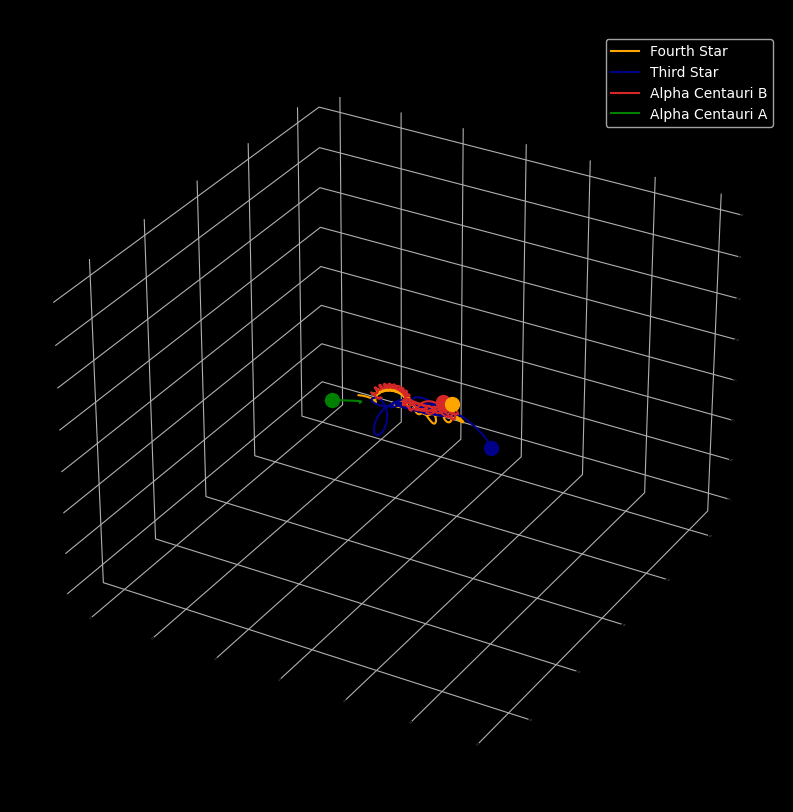

In [ ]:
# Crea la figura y los ejes 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_facecolor('black')

# Plot de las trayectorias de cada cuerpo
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='orange', label='Fourth Star')
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color='darkblue', label='Third Star')
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color='tab:red', label='Alpha Centauri B')
ax.plot(r4_sol[:, 0], r4_sol[:, 1], r4_sol[:, 2], color='green', label='Alpha Centauri A')

ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="orange",marker="o",s=100)
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="darkblue",marker="o",s=100)
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:red",marker="o",s=100)
ax.scatter(r4_sol[-1,0],r4_sol[-1,1],r4_sol[-1,2],color="green",marker="o",s=100)

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of orbits of stars in a three-body system')

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

In [ ]:
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    line3.set_data([], [])
    line3.set_3d_properties([])
    line4.set_data([], [])
    line4.set_3d_properties([])

    scat1._offsets3d = ([r1_sol[0, 0]], [r1_sol[0, 1]], [r1_sol[0, 2]])
    scat2._offsets3d = ([r2_sol[0, 0]], [r2_sol[0, 1]], [r2_sol[0, 2]])
    scat3._offsets3d = ([r3_sol[0, 0]], [r3_sol[0, 1]], [r3_sol[0, 2]])
    scat4._offsets3d = ([r4_sol[0, 0]], [r4_sol[0, 1]], [r4_sol[0, 2]])

    ax.legend(loc="upper left", fontsize=14)  # Agrega las leyendas al gráfico
    return line1, line2, scat1, scat2, scat3, scat4

In [ ]:
def update(num, r1_sol, r2_sol, r3_sol, r4_sol, line1, line2, line3, line4, scat1, scat2, scat3, scat4):
    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])

    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])

    line3.set_data(r3_sol[:num, 0], r3_sol[:num, 1])
    line3.set_3d_properties(r3_sol[:num, 2])

    line4.set_data(r4_sol[:num, 0], r4_sol[:num, 1])
    line4.set_3d_properties(r4_sol[:num, 2])

    scat1._offsets3d = ([r1_sol[num, 0]], [r1_sol[num, 1]], [r1_sol[num, 2]])
    scat2._offsets3d = ([r2_sol[num, 0]], [r2_sol[num, 1]], [r2_sol[num, 2]])
    scat3._offsets3d = ([r3_sol[num, 0]], [r3_sol[num, 1]], [r3_sol[num, 2]])
    scat4._offsets3d = ([r4_sol[num, 0]], [r4_sol[num, 1]], [r4_sol[num, 2]])

    return line1, line2, line3, line4, scat1, scat2, scat3, scat4


Animación guardada exitosamente.


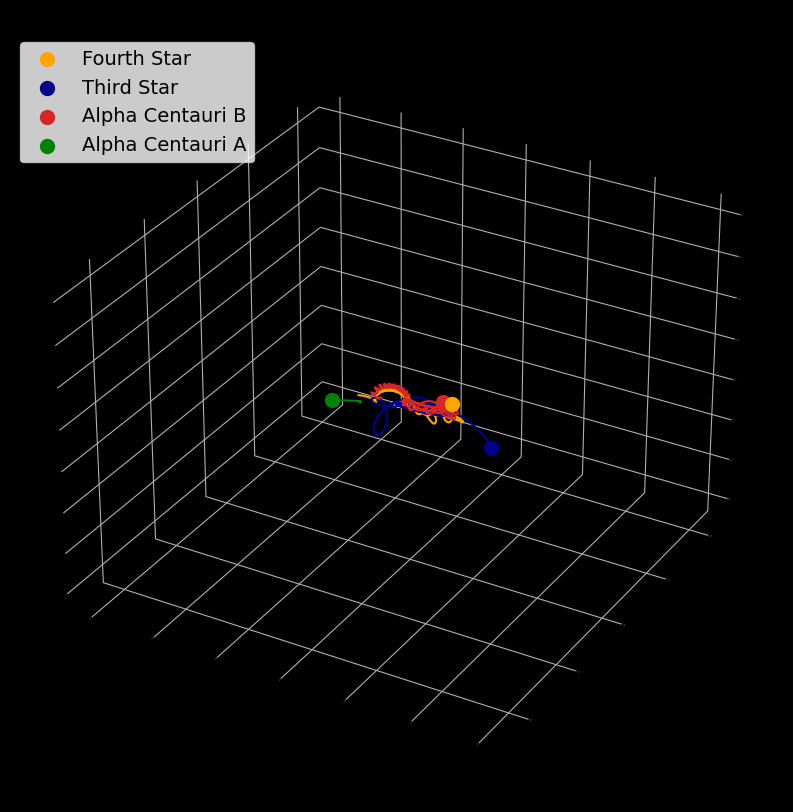

In [ ]:
# Creación de la figura y los ejes 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Establecer el color de fondo del subplot a oscuro
ax.set_facecolor('black')

# Dibujar las trayectorias de cada cuerpo
line1, = ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='orange')
line2, = ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color='darkblue')
line3, = ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color='tab:red')
line4, = ax.plot(r4_sol[:, 0], r4_sol[:, 1], r4_sol[:, 2], color='green')

scat1 = ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="orange", marker="o", s=100, label="Fourth Star")
scat2 = ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="darkblue", marker="o", s=100, label="Third Star")
scat3 = ax.scatter(r3_sol[0, 0], r3_sol[0, 1], r3_sol[0, 2], color="tab:red", marker="o", s=100, label="Alpha Centauri B")
scat4 = ax.scatter(r4_sol[0, 0], r4_sol[0, 1], r4_sol[0, 2], color="green", marker="o", s=100, label="Alpha Centauri A")

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of orbits of stars in a three-body system')

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# Crear la animación usando FuncAnimation
ani = FuncAnimation(fig, update, frames=int(len(time_span)), fargs=(r1_sol, r2_sol, r3_sol, r4_sol, line1, line2, line3, line4, scat1, scat2, scat3, scat4),
                    init_func=init, blit=True, interval=40)

from matplotlib.animation import PillowWriter  # Importa PillowWriter aquí

# Crea el escritor de video GIF
writer = PillowWriter(fps=30)

# Guarda la animación como un archivo MP4
try:
    #ani.save('C:\\Users\\santy\\Downloads\\animacion3.gif', writer=writer)
    ani.save('animacion3.gif', writer=writer)
    print("Animación guardada exitosamente.")
except FileNotFoundError as e:
    print("Error al guardar la animación:", e)


#Cuatro cuerpos v2

In [ ]:
# Define masses
m1 = 1.1  # Alpha Centauri A
m2 = 0.907  # Alpha Centauri B

# Define initial position vectors
r1 = np.array([-0.5, 0, 0], dtype="float64")  # m
r2 = np.array([0.5, 0, 0], dtype="float64")  # m

# Define initial velocities
v1 = np.array([0.01, 0.01, 0], dtype="float64")  # m/s
v2 = np.array([-0.05, 0, -0.1], dtype="float64")  # m/s

# Find velocity of COM
v_com = (m1 * v1 + m2 * v2) / (m1 + m2)

In [ ]:
#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=sci.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=sci.array(v3,dtype="float64")

In [ ]:
#Mass of the Fourth Star
m4=1.0 #Fourth Star
#Position of the Fourth Star
r4=[-0.5,0.5,-0.5] #m
r4=sci.array(r4,dtype="float64")
#Velocity of the Fourth Star
v4=[0, 0.5, 0]
v4=sci.array(v4,dtype="float64")

In [ ]:
# Find Centre of Mass
r_com = (m1 * r1 + m2 * r2) / (m1 + m2)
#Update COM formula
r_com=(m1*r1 + m2*r2 + m3*r3 + m4*v4)/(m1+m2+m3+m4)
#Update velocity of COM formula
v_com=(m1*v1 + m2*v2 + m3*v3 + m4*v4)/(m1+m2+m3+m4)

In [ ]:
def FourBodyEquations(w, t, G, m1, m2, m3, m4):
    r1 = w[:3]
    r2 = w[3:6]
    r3 = w[6:9]
    r4 = w[9:12]
    v1 = w[12:15]
    v2 = w[15:18]
    v3 = w[18:21]
    v4 = w[21:24]
    r12 = np.linalg.norm(r2 - r1)
    r13 = np.linalg.norm(r3 - r1)
    r14 = np.linalg.norm(r4 - r1)
    r23 = np.linalg.norm(r3 - r2)
    r24 = np.linalg.norm(r4 - r2)
    r34 = np.linalg.norm(r4 - r3)

    dv1bydt = K1*m2*(r2-r1)/r12**3  +  K1*m3*(r3-r1)/r13**3  +  K1*m4*(r1-r4)/r14**3
    dv2bydt = K1*m1*(r1-r2)/r12**3  +  K1*m3*(r3-r2)/r23**3  +  K1*m4*(r2-r4)/r24**3
    dv3bydt = K1*m1*(r1-r3)/r13**3  +  K1*m2*(r2-r3)/r23**3  +  K1*m4*(r3-r4)/r34**3
    dv4bydt = K1*m1*(r4-r1)/r14**3  +  K1*m2*(r2-r4)/r24**3  +  K1*m3*(r4-r3)/r34**3

    dr1bydt = K2 * v1
    dr2bydt = K2 * v2
    dr3bydt = K2 * v3
    dr4bydt = K2 * v4

    r12_derivs = np.concatenate((dr1bydt, dr2bydt))
    r24_derivs = np.concatenate((r12_derivs, dr3bydt))
    r_derivs = np.concatenate((r24_derivs, dr4bydt))

    v12_derivs = np.concatenate((dv1bydt, dv2bydt))
    v24_derivs = np.concatenate((v12_derivs, dv3bydt))
    v_derivs = np.concatenate((v24_derivs, dv4bydt))

    derivs = np.concatenate((r_derivs, v_derivs))
    return derivs

In [ ]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,r4,v1,v2,v3,v4]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,20,700) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
four_body_sol=sci.integrate.odeint(FourBodyEquations,init_params,time_span,args=(G,m1,m2,m3,m4))

<ipython-input-24-7dc3de1e08d7>:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,r4,v1,v2,v3,v4]) #Initial parameters
<ipython-input-24-7dc3de1e08d7>:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,20,700) #20 orbital periods and 500 points


In [ ]:
r1_sol=four_body_sol[:,:3]
r2_sol=four_body_sol[:,3:6]
r3_sol=four_body_sol[:,6:9]
r4_sol=four_body_sol[:,9:12]

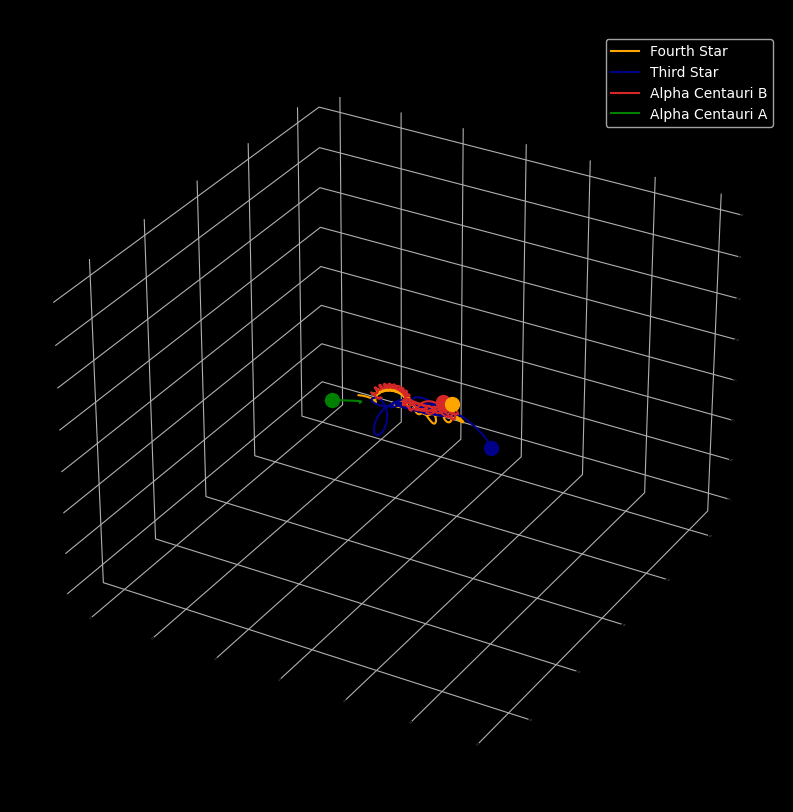

In [ ]:
# Crea la figura y los ejes 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_facecolor('black')

# Plot de las trayectorias de cada cuerpo
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='orange', label='Fourth Star')
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color='darkblue', label='Third Star')
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color='tab:red', label='Alpha Centauri B')
ax.plot(r4_sol[:, 0], r4_sol[:, 1], r4_sol[:, 2], color='green', label='Alpha Centauri A')

ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="orange",marker="o",s=100)
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="darkblue",marker="o",s=100)
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:red",marker="o",s=100)
ax.scatter(r4_sol[-1,0],r4_sol[-1,1],r4_sol[-1,2],color="green",marker="o",s=100)

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of orbits of stars in a three-body system')

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

In [ ]:
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    line3.set_data([], [])
    line3.set_3d_properties([])
    line4.set_data([], [])
    line4.set_3d_properties([])

    scat1._offsets3d = ([r1_sol[0, 0]], [r1_sol[0, 1]], [r1_sol[0, 2]])
    scat2._offsets3d = ([r2_sol[0, 0]], [r2_sol[0, 1]], [r2_sol[0, 2]])
    scat3._offsets3d = ([r3_sol[0, 0]], [r3_sol[0, 1]], [r3_sol[0, 2]])
    scat4._offsets3d = ([r4_sol[0, 0]], [r4_sol[0, 1]], [r4_sol[0, 2]])

    ax.legend(loc="upper left", fontsize=14)  # Agrega las leyendas al gráfico
    return line1, line2, scat1, scat2, scat3, scat4

In [ ]:
def update(num, r1_sol, r2_sol, r3_sol, r4_sol, line1, line2, line3, line4, scat1, scat2, scat3, scat4):
    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])

    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])

    line3.set_data(r3_sol[:num, 0], r3_sol[:num, 1])
    line3.set_3d_properties(r3_sol[:num, 2])

    line4.set_data(r4_sol[:num, 0], r4_sol[:num, 1])
    line4.set_3d_properties(r4_sol[:num, 2])

    scat1._offsets3d = ([r1_sol[num, 0]], [r1_sol[num, 1]], [r1_sol[num, 2]])
    scat2._offsets3d = ([r2_sol[num, 0]], [r2_sol[num, 1]], [r2_sol[num, 2]])
    scat3._offsets3d = ([r3_sol[num, 0]], [r3_sol[num, 1]], [r3_sol[num, 2]])
    scat4._offsets3d = ([r4_sol[num, 0]], [r4_sol[num, 1]], [r4_sol[num, 2]])

    return line1, line2, line3, line4, scat1, scat2, scat3, scat4


Animación guardada exitosamente.


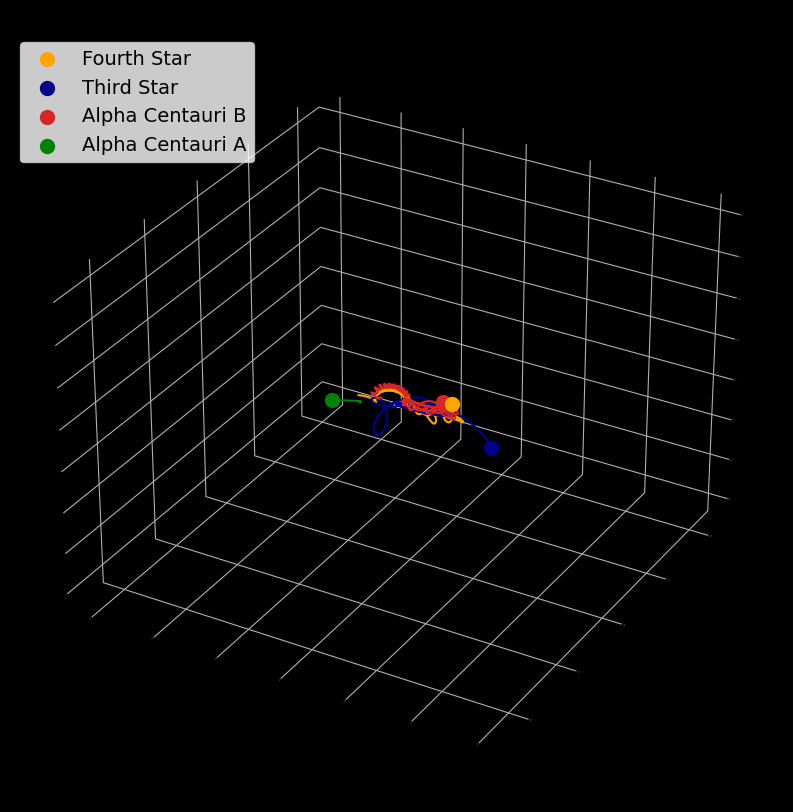

In [ ]:
# Creación de la figura y los ejes 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Establecer el color de fondo del subplot a oscuro
ax.set_facecolor('black')

# Dibujar las trayectorias de cada cuerpo
line1, = ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], color='orange')
line2, = ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], color='darkblue')
line3, = ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], color='tab:red')
line4, = ax.plot(r4_sol[:, 0], r4_sol[:, 1], r4_sol[:, 2], color='green')

scat1 = ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color="orange", marker="o", s=100, label="Fourth Star")
scat2 = ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color="darkblue", marker="o", s=100, label="Third Star")
scat3 = ax.scatter(r3_sol[0, 0], r3_sol[0, 1], r3_sol[0, 2], color="tab:red", marker="o", s=100, label="Alpha Centauri B")
scat4 = ax.scatter(r4_sol[0, 0], r4_sol[0, 1], r4_sol[0, 2], color="green", marker="o", s=100, label="Alpha Centauri A")

# Añadir etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of orbits of stars in a three-body system')

# Añadir leyenda con texto blanco y fondo negro
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

# Establecer el color de fondo de la figura a oscuro
fig.patch.set_facecolor('black')

# Establecer los planos XY, YZ, XZ a negro
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

# Crear la animación usando FuncAnimation
ani = FuncAnimation(fig, update, frames=int(len(time_span)), fargs=(r1_sol, r2_sol, r3_sol, r4_sol, line1, line2, line3, line4, scat1, scat2, scat3, scat4),
                    init_func=init, blit=True, interval=40)

from matplotlib.animation import PillowWriter  # Importa PillowWriter aquí

# Crea el escritor de video GIF
writer = PillowWriter(fps=30)

# Guarda la animación como un archivo MP4
try:
    #ani.save('C:\\Users\\santy\\Downloads\\animacion3.gif', writer=writer)
    ani.save('animacion3.gif', writer=writer)
    print("Animación guardada exitosamente.")
except FileNotFoundError as e:
    print("Error al guardar la animación:", e)
